In [1]:
# initialize accelerator and trackers (if enabled)
from os import makedirs, path, scandir
import pickle
import cv2
import json
from yacs.config import CfgNode as CN
from torch.utils.data import Dataset
from tqdm import tqdm
import logging
import random
import torch
# from src.datasets import FFPP,RPPG
from accelerate import Accelerator
from main import get_config, init_accelerator, set_seed, FFPP, DFDC, CDF
logging.basicConfig(level="DEBUG", format='[%(levelname)s][%(filename)s:%(lineno)d]: %(message)s')


class Obj:
    pass


c = FFPP.get_default_config()
c.augmentation = "dev-mode+force-extreme"
# c.pair = 1
c.contrast = 1
# c.compressions = ["c23", "raw"]
# c.compressions = ["raw", "c23"]
c.compressions = ["c23"]
# c.ssl_fake = 1
c.types = ["REAL", "DF", "FS", "F2F", "NT"]
# c.types = ["REAL"]
c.root_dir = "./datasets/ffpp/"
c.vid_ext = ".avi"
# c.types = ["DF", "FS", "F2F"]
accelerator = Accelerator(mixed_precision='no')
x = FFPP(c, 20, 4, lambda x: x, accelerator, split="train")
c

  0%|          | 0/5 [00:00<?, ?it/s]

[DEBUG][datasets.py:604]: DF TYPES:['REAL', 'NT', 'FS', 'F2F', 'DF']
[DEBUG][datasets.py:605]: DF TYPES:['c23']
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/950 does not present in the processed dataset.
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/850 does not present in the processed dataset.
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/033 does not present in the processed dataset.
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/210 does not present in the processed dataset.
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/276 does not present in the processed dataset.
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/509 does not present in the processed dataset.
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/156 does not present in the processed dataset.
[WARNING][datasets.py:621]: Video ./datasets/ffpp/real/c23/videos/846 does not present in the pro

CfgNode({'category': 'train', 'root_dir': './datasets/ffpp/', 'vid_ext': '.avi', 'detection_level': 'video', 'types': ['REAL', 'DF', 'FS', 'F2F', 'NT'], 'compressions': ['c23'], 'name': 'FFPP', 'scale': 1.0, 'pack': False, 'pair': False, 'contrast': 1, 'ssl_fake': False, 'contrast_pair': False, 'augmentation': 'dev-mode+force-extreme', 'random_speed': True})

In [2]:
# x.video_table["REAL"]["c23"]

In [3]:
typ, cmp, idx, _ = x.video_list[1234]
x.video_table[typ][cmp][idx]

{'fps': 30.0,
 'frames': 432,
 'duration': 14.399999999999999,
 'path': './datasets/ffpp/NT/c23/videos/019_018.avi'}

In [4]:
a = x.get_dict(7079, True)

[DEBUG][datasets.py:735]: Item/Video Index:7079/1987
[DEBUG][datasets.py:736]: Item DF/COMP:FS/c23
[DEBUG][datasets.py:747]: Video Speed Motion Factor: 0.5155035948840605
[DEBUG][datasets.py:748]: Video Shift Factor: 0.175405209954569
[DEBUG][datasets.py:783]: Loading Video: ./datasets/ffpp/FS/c23/videos/704_723.avi
[DEBUG][datasets.py:784]: Sample Offset: 8
[DEBUG][datasets.py:785]: Sample Stride: 0.10526315789473685
[DEBUG][datasets.py:798]: Augmentations Applied.
[DEBUG][datasets.py:811]: Video: ./datasets/ffpp/FS/c23/videos/704_723.avi, Completed!


In [5]:
len(x)

13341

In [6]:
# frames, label, mask, _, _ = x[random.randint(0, len(x))]
frames, label, mask, _, _ = x[9751]
(len(frames), label, len(mask))

[DEBUG][datasets.py:735]: Item/Video Index:9751/2659
[DEBUG][datasets.py:736]: Item DF/COMP:F2F/c23
[DEBUG][datasets.py:747]: Video Speed Motion Factor: 0.5246683071184313
[DEBUG][datasets.py:748]: Video Shift Factor: 0.06465173524024387
[DEBUG][datasets.py:783]: Loading Video: ./datasets/ffpp/F2F/c23/videos/841_639.avi
[DEBUG][datasets.py:784]: Sample Offset: 8
[DEBUG][datasets.py:785]: Sample Stride: 0.10701754385964914
[DEBUG][datasets.py:798]: Augmentations Applied.
[DEBUG][datasets.py:811]: Video: ./datasets/ffpp/F2F/c23/videos/841_639.avi, Completed!
[DEBUG][datasets.py:735]: Item/Video Index:505/114
[DEBUG][datasets.py:736]: Item DF/COMP:REAL/c23
[DEBUG][datasets.py:747]: Video Speed Motion Factor: 0.8598753140523367
[DEBUG][datasets.py:748]: Video Shift Factor: 0.0013854746571707556
[DEBUG][datasets.py:783]: Loading Video: ./datasets/ffpp/real/c23/videos/324.avi
[DEBUG][datasets.py:784]: Sample Offset: 24
[DEBUG][datasets.py:785]: Sample Stride: 0.1768421052631579
[DEBUG][datas

(2, [1, 0], 2)

In [7]:
frames[0].keys(), frames[1].keys()

(dict_keys(['c23']), dict_keys(['c23']))

[DEBUG][pyplot.py:339]: Loaded backend module://matplotlib_inline.backend_inline version unknown.
[DEBUG][pyplot.py:339]: Loaded backend module://matplotlib_inline.backend_inline version unknown.
[DEBUG][font_manager.py:1378]: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[DEBUG][font_manager.py:1390]: findfont: score(FontEntry(fname='/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[DEBUG][font_manager.py:1390]: findfont: score(FontEntry(fname='/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[DEBUG][font_manager.py:1390]: findfont: score(FontEntry(fname='/home/od/anaconda3/envs/dfd-clip/lib/python3

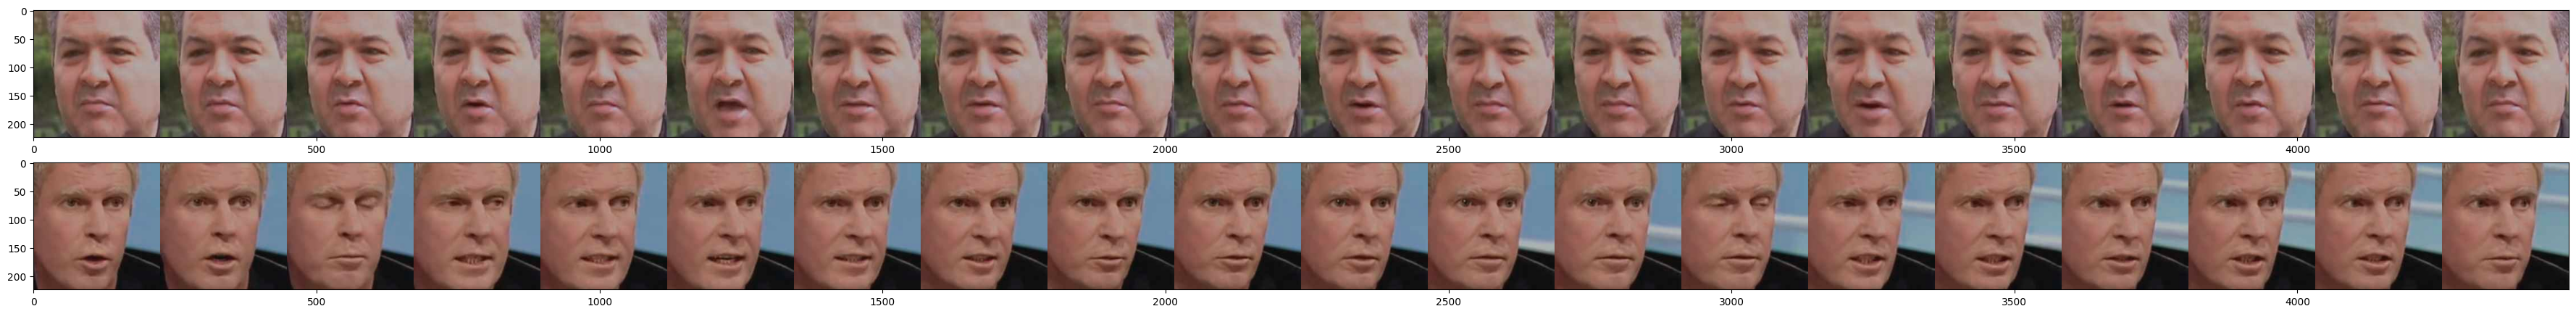

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 5))
plt.subplot(2, 1, 1)
plt.imshow(
    np.stack(
        frames[0]["c23"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((x.n_px, -1, 3))
)
plt.subplot(2, 1, 2)
plt.imshow(
    np.stack(
        frames[1]["c23"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((x.n_px, -1, 3))
)

In [ ]:
label

In [ ]:
# for i in tqdm(range(len(x))):
#     try:
#         x[i]
#     except Exception as e:
#         print(f"Error Occur at {i}:{e}")